In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/match_data.csv')
df = df.drop(['Team1', 'Team2', 'Date'], axis=1)
df.head()

,Score,Team1_Position,Team1_Win_Percentage,Team2_Position,Team2_Win_Percentage,Team1_Player1_Rating,Team1_Player1_Kills_Per_Round,Team1_Player1_Deaths_Per_Round,Team1_Player1_Headshots,Team1_Player2_Rating,...,Team2_Player3_Deaths_Per_Round,Team2_Player3_Headshots,Team2_Player4_Rating,Team2_Player4_Kills_Per_Round,Team2_Player4_Deaths_Per_Round,Team2_Player4_Headshots,Team2_Player5_Rating,Team2_Player5_Kills_Per_Round,Team2_Player5_Deaths_Per_Round,Team2_Player5_Headshots
0,0,4,79.2,1,72.4,1.03,0.63,0.64,56.1,1.21,...,0.63,54.0,1.12,0.71,0.60,52.5,1.18,0.74,0.59,35.1
1,1,4,79.2,2,77.3,1.03,0.63,0.64,56.1,1.21,...,0.65,65.9,1.16,0.73,0.65,51.2,1.17,0.74,0.57,38.4
2,1,4,79.2,18,72.0,1.03,0.63,0.64,56.1,1.21,...,0.64,48.6,1.14,0.73,0.61,52.2,1.11,0.69,0.66,53.5
3,1,4,79.2,7,63.0,1.03,0.63,0.64,56.1,1.21,...,0.65,35.8,1.09,0.65,0.67,48.0,1.12,0.68,0.57,45.9
4,1,4,79.2,30,62.0,1.03,0.63,0.64,56.1,1.21,...,0.66,55.2,1.10,0.68,0.68,55.5,1.09,0.66,0.66,52.3


In [3]:
def sigmoid(z):
    """Numerically stable sigmoid function."""
    z = np.clip(z, -500, 500)  # Limit z to avoid overflow
    return np.where(z >= 0,
                    1 / (1 + np.exp(-z)),
                    np.exp(z) / (1 + np.exp(z)))

In [4]:
def cross_entropy(y, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


In [5]:
def compute_gradients(X, y, y_pred):
    diff = y_pred - y
    return np.dot(X.T, diff) / len(y)

In [7]:
def initialize_weights(size):
    std_dev = np.sqrt(2 / (size + 1))
    return np.random.randn(size) * std_dev

In [8]:
def logistic_regression(X, y, lr, epochs, e=1e-6):
    w = initialize_weights(X.shape[1])
    losses = []
    for epoch in range(epochs):
        z = np.dot(X, w)
        y_pred = sigmoid(z)
        loss = cross_entropy(y, y_pred)
        gradients = compute_gradients(X, y, y_pred)
        w -= lr * gradients
        new_loss = cross_entropy(y, sigmoid(np.dot(X, w)))
        losses.append(new_loss)
        if epoch % 250 == 0:
            print(f'Epoch {epoch}, loss {loss}')
        if np.abs(new_loss - loss) < e:
            print(np.abs(new_loss - loss))
            print(f'Converged at epoch {epoch}')
            break
    return w, losses

In [10]:
def predict(X, w, threshold=0.5):
    z = np.dot(X, w)
    probabilities = sigmoid(z)
    return (probabilities >= threshold).astype(int)


In [11]:
X = df.drop(['Score'], axis=1)
X.head()


,Team1_Position,Team1_Win_Percentage,Team2_Position,Team2_Win_Percentage,Team1_Player1_Rating,Team1_Player1_Kills_Per_Round,Team1_Player1_Deaths_Per_Round,Team1_Player1_Headshots,Team1_Player2_Rating,Team1_Player2_Kills_Per_Round,...,Team2_Player3_Deaths_Per_Round,Team2_Player3_Headshots,Team2_Player4_Rating,Team2_Player4_Kills_Per_Round,Team2_Player4_Deaths_Per_Round,Team2_Player4_Headshots,Team2_Player5_Rating,Team2_Player5_Kills_Per_Round,Team2_Player5_Deaths_Per_Round,Team2_Player5_Headshots
0,4,79.2,1,72.4,1.03,0.63,0.64,56.1,1.21,0.74,...,0.63,54.0,1.12,0.71,0.60,52.5,1.18,0.74,0.59,35.1
1,4,79.2,2,77.3,1.03,0.63,0.64,56.1,1.21,0.74,...,0.65,65.9,1.16,0.73,0.65,51.2,1.17,0.74,0.57,38.4
2,4,79.2,18,72.0,1.03,0.63,0.64,56.1,1.21,0.74,...,0.64,48.6,1.14,0.73,0.61,52.2,1.11,0.69,0.66,53.5
3,4,79.2,7,63.0,1.03,0.63,0.64,56.1,1.21,0.74,...,0.65,35.8,1.09,0.65,0.67,48.0,1.12,0.68,0.57,45.9
4,4,79.2,30,62.0,1.03,0.63,0.64,56.1,1.21,0.74,...,0.66,55.2,1.10,0.68,0.68,55.5,1.09,0.66,0.66,52.3


In [18]:
y = df['Score']
y = y.values

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
X

array([[-1.05145274,  1.65132967, -1.26444068, ...,  0.58597532,
        -1.20016667, -1.82837029],
       [-1.05145274,  1.65132967, -1.20676088, ...,  0.58597532,
        -1.64480175, -1.44307383],
       [-1.05145274,  1.65132967, -0.28388398, ..., -0.0829403 ,
         0.35605612,  0.31994938],
       ...,
       [ 1.89011819, -1.8879098 ,  1.3311506 , ...,  0.05084282,
        -0.53321405,  0.34330068],
       [ 1.89011819, -1.8879098 ,  1.27347079, ..., -0.6180728 ,
        -0.31089651,  0.54178673],
       [ 1.89011819, -1.8879098 ,  3.00386498, ...,  0.18462595,
         1.02300874,  0.46005718]])

In [20]:
X[1]

array([-1.05145274,  1.65132967, -1.20676088,  1.41282585, -0.2319657 ,
       -0.27253566, -0.31315283,  0.90003205,  1.1673928 ,  0.97812987,
       -3.03465801, -1.63189269,  0.12523644, -1.14309623, -1.55142616,
       -0.33893255,  0.64052006, -0.08008058, -0.24422441, -1.81576738,
        3.81737174,  3.96143534,  0.34922635,  1.14321813, -1.54755109,
       -2.12039397, -0.12333656, -0.60567026, -0.72556889, -0.63272124,
        0.61203526, -0.80990526,  0.1502777 ,  0.21391327,  0.25406446,
        1.5487827 ,  1.01444233,  0.98116381, -0.02399162,  0.05204533,
        0.54632025,  0.58597532, -1.64480175, -1.44307383])

In [21]:
lr = 0.1
epochs = 10000

In [22]:
w, losses = logistic_regression(X, y, lr, epochs)

Epoch 0, loss 0.8786676765254385
Epoch 250, loss 0.6536300153797738
Epoch 500, loss 0.65077920937409
Epoch 750, loss 0.64965865327222
Epoch 1000, loss 0.6490158806634538
Epoch 1250, loss 0.6485862216645161
Epoch 1500, loss 0.6482801590282695
9.99796443301726e-07
Converged at epoch 1532


In [23]:
print(f"Weights: {w}")

Weights: [-0.39677555  0.25451122  0.39865165 -0.19830526 -0.08396962  0.04382976
  0.14878862 -0.11294916  0.14032582 -0.13421974  0.04693807  0.0019873
 -0.05376167  0.01799473  0.09679628 -0.00121472 -0.05710731 -0.11476833
 -0.07791501 -0.00632132  0.23394874 -0.17363968 -0.05084588  0.10601303
  0.00456958  0.0167979  -0.17945898  0.12311795 -0.12672567  0.11141134
 -0.04410433  0.03835378 -0.0522627   0.04613857 -0.06838706 -0.01015767
  0.16664726  0.02708388  0.06908807  0.01707443 -0.12605062  0.08956662
  0.06709536 -0.0532459 ]


Text(0, 0.5, 'Loss')

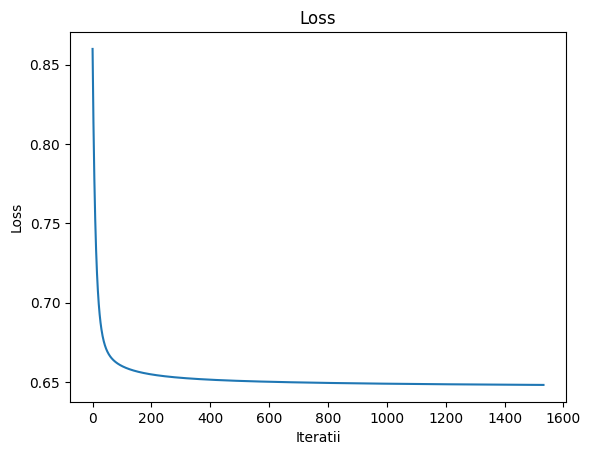

In [24]:
plt.title("Loss")
plt.plot(losses)
plt.xlabel("Iteratii")
plt.ylabel("Loss")

In [25]:
y_pred = predict(X, w)

In [26]:
print(classification_report(y, y_pred))
confusion_matrix = metrics.confusion_matrix(y, y_pred)
conf_matrix_df = pd.DataFrame(confusion_matrix, index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df)

              precision    recall  f1-score   support

           0       0.61      0.63      0.62      1259
           1       0.63      0.61      0.62      1296

    accuracy                           0.62      2555
   macro avg       0.62      0.62      0.62      2555
weighted avg       0.62      0.62      0.62      2555

                 Predicted Negative  Predicted Positive
Actual Negative                 796                 463
Actual Positive                 501                 795
